In [2]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

In [3]:
unscaled_data = pd.read_csv('./data/feature_selection/resale_feature_selection_not_scaled.csv')

In [4]:
unscaled_data.head()

,floor_area_sqm,total_resales_in_town,nearest_mrt_dist,remaining_lease,town_BUKIT MERAH,flat_type_3 ROOM,street_name_CANTONMENT RD,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_19 TO 21,...,town_JURONG EAST,town_BEDOK,storey_range_31 TO 33,nearest_primary_school_RADIN MAS PRIMARY SCHOOL,nearest_mrt_Tiong Bahru,nearest_mrt_Sengkang,total_resales_in_street,nearest_mrt_Outram Park,storey_range_28 TO 30,resale_price
0,44.0,189,1.003996,55.416667,0,0,0,1,0,0,...,0,0,0,0,0,0,40,0,0,267000.0
1,49.0,189,0.304447,53.500000,0,0,0,0,1,0,...,0,0,0,0,0,0,37,0,0,300000.0
2,44.0,189,0.416219,54.083333,0,0,0,0,1,0,...,0,0,0,0,0,0,37,0,0,280000.0
3,44.0,189,0.416219,54.083333,0,0,0,0,0,0,...,0,0,0,0,0,0,37,0,0,282000.0
4,45.0,189,1.280521,62.083333,0,0,0,1,0,0,...,0,0,0,0,0,0,20,0,0,289800.0


In [5]:
unscaled_data.describe()

,floor_area_sqm,total_resales_in_town,nearest_mrt_dist,remaining_lease,town_BUKIT MERAH,flat_type_3 ROOM,street_name_CANTONMENT RD,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_19 TO 21,...,town_JURONG EAST,town_BEDOK,storey_range_31 TO 33,nearest_primary_school_RADIN MAS PRIMARY SCHOOL,nearest_mrt_Tiong Bahru,nearest_mrt_Sengkang,total_resales_in_street,nearest_mrt_Outram Park,storey_range_28 TO 30,resale_price
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4.410000e+03
mean,94.821156,234.816780,0.859754,73.789021,0.036508,0.265986,0.002041,0.170975,0.229478,0.016780,...,0.018821,0.053968,0.002041,0.003855,0.014512,0.085941,18.998639,0.003855,0.004989,5.556083e+05
std,24.082048,101.834821,0.453918,15.054199,0.187572,0.441907,0.045134,0.376530,0.420545,0.128461,...,0.135907,0.225981,0.045134,0.061975,0.119604,0.280309,17.129396,0.061975,0.070462,1.686516e+05
min,37.000000,6.000000,0.036138,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.300000e+05
25%,73.000000,152.000000,0.498500,61.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,4.300000e+05
50%,93.000000,223.000000,0.787363,73.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,5.350000e+05
75%,111.750000,362.000000,1.160318,90.583333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,6.480000e+05
max,192.000000,387.000000,3.479159,95.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,93.000000,1.000000,1.000000,1.340000e+06


In [6]:
unscaled_data.columns

Index(['floor_area_sqm', 'total_resales_in_town', 'nearest_mrt_dist',
       'remaining_lease', 'town_BUKIT MERAH', 'flat_type_3 ROOM',
       'street_name_CANTONMENT RD', 'storey_range_01 TO 03',
       'storey_range_04 TO 06', 'storey_range_19 TO 21',
       'flat_model_Apartment', 'flat_model_Maisonette', 'town_PASIR RIS',
       'street_name_DAWSON RD', 'flat_model_Premium Apartment',
       'nearest_mall_dist', 'total_nearby_mrt', 'street_name_ANG MO KIO ST 51',
       'flat_model_New Generation', 'nearest_bus_stop_Blk 18',
       'town_SEMBAWANG', 'flat_type_2 ROOM', 'flat_type_5 ROOM',
       'flat_type_EXECUTIVE', 'flat_model_Standard', 'flat_model_Type S1',
       'flat_model_Model A', 'storey_range_16 TO 18', 'flat_model_Simplified',
       'flat_model_DBSS', 'town_MARINE PARADE', 'flat_model_Improved',
       'storey_range_07 TO 09',
       'nearest_primary_school_ZHANGDE PRIMARY SCHOOL',
       'street_name_JLN BAHAGIA', 'town_BUKIT BATOK', 'town_BUKIT PANJANG',
       'tow

In [7]:
unscaled_data['price_per_sqm'] = unscaled_data['resale_price']/unscaled_data['floor_area_sqm']

In [8]:
unscaled_data.head()

,floor_area_sqm,total_resales_in_town,nearest_mrt_dist,remaining_lease,town_BUKIT MERAH,flat_type_3 ROOM,street_name_CANTONMENT RD,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_19 TO 21,...,town_BEDOK,storey_range_31 TO 33,nearest_primary_school_RADIN MAS PRIMARY SCHOOL,nearest_mrt_Tiong Bahru,nearest_mrt_Sengkang,total_resales_in_street,nearest_mrt_Outram Park,storey_range_28 TO 30,resale_price,price_per_sqm
0,44.0,189,1.003996,55.416667,0,0,0,1,0,0,...,0,0,0,0,0,40,0,0,267000.0,6068.181818
1,49.0,189,0.304447,53.500000,0,0,0,0,1,0,...,0,0,0,0,0,37,0,0,300000.0,6122.448980
2,44.0,189,0.416219,54.083333,0,0,0,0,1,0,...,0,0,0,0,0,37,0,0,280000.0,6363.636364
3,44.0,189,0.416219,54.083333,0,0,0,0,0,0,...,0,0,0,0,0,37,0,0,282000.0,6409.090909
4,45.0,189,1.280521,62.083333,0,0,0,1,0,0,...,0,0,0,0,0,20,0,0,289800.0,6440.000000


In [9]:
unscaled_data.describe()

,floor_area_sqm,total_resales_in_town,nearest_mrt_dist,remaining_lease,town_BUKIT MERAH,flat_type_3 ROOM,street_name_CANTONMENT RD,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_19 TO 21,...,town_BEDOK,storey_range_31 TO 33,nearest_primary_school_RADIN MAS PRIMARY SCHOOL,nearest_mrt_Tiong Bahru,nearest_mrt_Sengkang,total_resales_in_street,nearest_mrt_Outram Park,storey_range_28 TO 30,resale_price,price_per_sqm
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4.410000e+03,4410.000000
mean,94.821156,234.816780,0.859754,73.789021,0.036508,0.265986,0.002041,0.170975,0.229478,0.016780,...,0.053968,0.002041,0.003855,0.014512,0.085941,18.998639,0.003855,0.004989,5.556083e+05,5923.272014
std,24.082048,101.834821,0.453918,15.054199,0.187572,0.441907,0.045134,0.376530,0.420545,0.128461,...,0.225981,0.045134,0.061975,0.119604,0.280309,17.129396,0.061975,0.070462,1.686516e+05,1319.972500
min,37.000000,6.000000,0.036138,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.300000e+05,3403.508772
25%,73.000000,152.000000,0.498500,61.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,4.300000e+05,5066.342441
50%,93.000000,223.000000,0.787363,73.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,5.350000e+05,5585.236118
75%,111.750000,362.000000,1.160318,90.583333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,6.480000e+05,6400.000000
max,192.000000,387.000000,3.479159,95.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,93.000000,1.000000,1.000000,1.340000e+06,13723.404255


In [10]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(unscaled_data, test_size = 0.2, random_state = 42)

In [11]:
# perform scaling on quantitative features

# total_resales_in_town
# nearest_mrt_dist
# remaining_lease'
    
# nearest_mall_dist
# total_nearby_mrt

# total_resales_in_block
# total_resales_in_street

In [12]:
train_y = train_df['price_per_sqm']
train_x = train_df.drop(['price_per_sqm', 'floor_area_sqm', 'resale_price'], axis=1)

test_y = test_df['price_per_sqm']
test_x = test_df.drop(['price_per_sqm', 'floor_area_sqm', 'resale_price'], axis=1)

In [13]:
reg = LinearRegression().fit(train_x, train_y)

In [14]:
reg.score(train_x, train_y)

0.8497037887882943

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

pred_y = reg.predict(test_x) 

print(f"RMSE: {mean_squared_error(pred_y * test_df['floor_area_sqm'], test_df['resale_price'], squared=False)}")

print(f"MSE: {mean_squared_error(pred_y * test_df['floor_area_sqm'], test_df['resale_price'], squared=True)}")

print(f"MAPE: {mean_absolute_percentage_error(pred_y * test_df['floor_area_sqm'], test_df['resale_price'])}" )

RMSE: 49426.826997841184
MSE: 2443011227.0745225
MAPE: 0.06620348238280643


In [17]:
train_price_y = train_df['resale_price']
train_price_x = train_df.drop(['price_per_sqm', 'resale_price'], axis=1)

test_price_y = test_df['resale_price']
test_price_x = test_df.drop(['price_per_sqm', 'resale_price'], axis=1)

In [18]:
train_df.describe()

,floor_area_sqm,total_resales_in_town,nearest_mrt_dist,remaining_lease,town_BUKIT MERAH,flat_type_3 ROOM,street_name_CANTONMENT RD,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_19 TO 21,...,town_BEDOK,storey_range_31 TO 33,nearest_primary_school_RADIN MAS PRIMARY SCHOOL,nearest_mrt_Tiong Bahru,nearest_mrt_Sengkang,total_resales_in_street,nearest_mrt_Outram Park,storey_range_28 TO 30,resale_price,price_per_sqm
count,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,...,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3.528000e+03,3528.000000
mean,95.090788,234.252551,0.856008,73.763251,0.035998,0.258503,0.002551,0.174036,0.227608,0.016156,...,0.052721,0.002268,0.004252,0.014172,0.085601,18.755385,0.004819,0.004535,5.570365e+05,5918.672653
std,23.925711,102.023088,0.452228,14.959429,0.186311,0.437874,0.050450,0.379194,0.419347,0.126095,...,0.223508,0.047572,0.065076,0.118218,0.279813,16.906956,0.069258,0.067200,1.694671e+05,1320.094818
min,37.000000,6.000000,0.036138,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.300000e+05,3403.508772
25%,74.000000,152.000000,0.496064,61.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,4.330000e+05,5068.261755
50%,93.000000,223.000000,0.782662,73.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,5.350000e+05,5567.270033
75%,111.000000,362.000000,1.153094,90.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,6.452220e+05,6397.256483
max,192.000000,387.000000,3.479159,95.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,93.000000,1.000000,1.000000,1.340000e+06,13723.404255


In [19]:
reg2 = LinearRegression().fit(train_price_x, train_price_y)
reg2.score(train_price_x, train_price_y)

0.9049534725102613

In [20]:
pred_price_y = reg2.predict(test_price_x) 

print(f"RMSE: {mean_squared_error(pred_price_y, test_price_y, squared=False)}")

print(f"MSE: {mean_squared_error(pred_price_y, test_price_y, squared=True)}")

print(f"MAPE: {mean_absolute_percentage_error(pred_price_y, test_price_y)}" )

RMSE: 54316.37118057538
MSE: 2950268178.2260394
MAPE: 0.0780557332344016


In [21]:
print("TRAIN")
print(reg.score(train_x, train_y))
print(reg2.score(train_price_x, train_price_y))

print('\nTEST')
print(reg.score(test_x, test_y))
print(reg2.score(test_price_x, test_price_y))

TRAIN
0.8497037887882943
0.9049534725102613

TEST
0.8461168378576372
0.8919312720249223


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=42)
reg.fit(train_x, train_y)

GradientBoostingRegressor(random_state=42)

In [23]:
print(reg.score(train_x, train_y))
print(reg.score(test_x, test_y))

0.8838548946496559
0.8662866062721712


In [28]:
pred_y = reg.predict(test_x) 

print(f"RMSE: {mean_squared_error(pred_y * test_df['floor_area_sqm'], test_df['resale_price'], squared=False)}")

print(f"MSE: {mean_squared_error(pred_y * test_df['floor_area_sqm'], test_df['resale_price'], squared=True)}")

print(f"MAPE: {mean_absolute_percentage_error(pred_y * test_df['floor_area_sqm'], test_df['resale_price'])}" )

RMSE: 46412.7608286664
MSE: 2154144367.738991
MAPE: 0.05901775833416191


In [29]:
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.1],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100, 500, 1000, 1500],
              'max_depth'    : [10, 20, 30, 50]
             }


GBR = GradientBoostingRegressor(random_state=42)
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(train_x, train_y)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.1],
                         'max_depth': [10, 20, 30, 50],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [31]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=1500,
                          random_state=42, subsample=0.2)

 The best score across ALL searched params:
 0.8968128164421292

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1500, 'subsample': 0.2}


In [32]:
pred_y = grid_GBR.predict(test_x) 

print(f"RMSE: {mean_squared_error(pred_y * test_df['floor_area_sqm'], test_df['resale_price'], squared=False)}")

print(f"MSE: {mean_squared_error(pred_y * test_df['floor_area_sqm'], test_df['resale_price'], squared=True)}")

print(f"MAPE: {mean_absolute_percentage_error(pred_y * test_df['floor_area_sqm'], test_df['resale_price'])}" )

RMSE: 35003.75237082601
MSE: 1225262680.0381076
MAPE: 0.04342378394524176


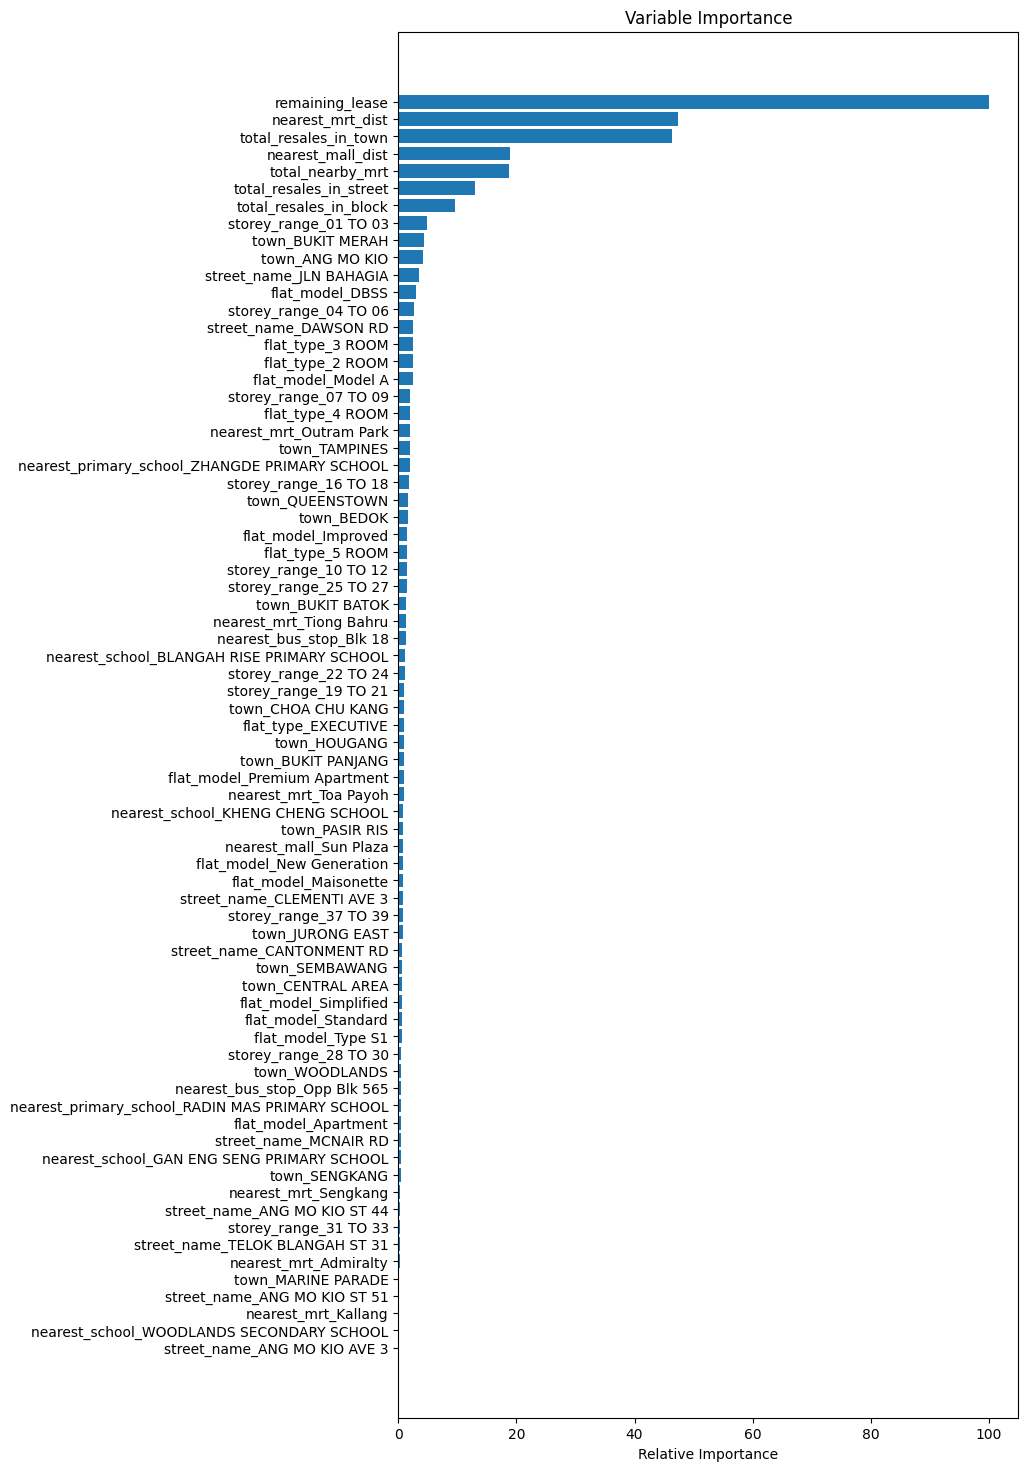

In [39]:
import matplotlib.pyplot as plt

feature_importance = grid_GBR.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_x.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


In [135]:
reg2 = GradientBoostingRegressor(random_state=1)
reg2.fit(train_price_x, train_price_y)

GradientBoostingRegressor(random_state=1)

In [25]:
pred_price_y = reg2.predict(test_price_x) 

print(f"RMSE: {mean_squared_error(pred_price_y, test_price_y, squared=False)}")

print(f"MSE: {mean_squared_error(pred_price_y, test_price_y, squared=True)}")

print(f"MAPE: {mean_absolute_percentage_error(pred_price_y, test_price_y)}" )

RMSE: 54316.37118057538
MSE: 2950268178.2260394
MAPE: 0.0780557332344016


In [137]:
print("TRAIN")
print(reg.score(train_x, train_y))
print(reg2.score(train_price_x, train_price_y))

print('\nTEST')
print(reg.score(test_x, test_y))
print(reg2.score(test_price_x, test_price_y))

TRAIN
0.8838548946496559
0.9255936939558768

TEST
0.8662866062721712
0.9060494472352904
